[View in Colaboratory](https://colab.research.google.com/github/HUSTneeb/GoogleColabCode/blob/master/TensorFlowLearning4.ipynb)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.11.0-rc2


In [0]:
NUM_WORDS=10000

(train_data,train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dimension):
  results=np.zeros((len(sequences),dimension))
  for i,word_indices in enumerate(sequences):
    results[i,word_indices]=1.0
    
  return results

train_data=multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data,dimension=NUM_WORDS)

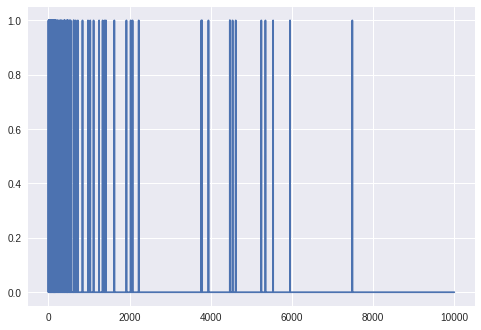

In [4]:
plt.plot(train_data[0])

In [7]:
baseline_model=keras.Sequential([
    keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16,activation=tf.nn.relu),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_model.fit(train_data,train_labels,
                  epochs=20,
                  batch_size=512,
                  validation_data=(test_data,test_labels),
                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5048 - acc: 0.7886 - binary_crossentropy: 0.5048 - val_loss: 0.3465 - val_acc: 0.8750 - val_binary_crossentropy: 0.3465
Epoch 2/20
 - 4s - loss: 0.2520 - acc: 0.9100 - binary_crossentropy: 0.2520 - val_loss: 0.2861 - val_acc: 0.8864 - val_binary_crossentropy: 0.2861
Epoch 3/20
 - 4s - loss: 0.1797 - acc: 0.9377 - binary_crossentropy: 0.1797 - val_loss: 0.2925 - val_acc: 0.8846 - val_binary_crossentropy: 0.2925
Epoch 4/20
 - 4s - loss: 0.1414 - acc: 0.9522 - binary_crossentropy: 0.1414 - val_loss: 0.3207 - val_acc: 0.8786 - val_binary_crossentropy: 0.3207
Epoch 5/20
 - 4s - loss: 0.1164 - acc: 0.9617 - binary_crossentropy: 0.1164 - val_loss: 0.3469 - val_acc: 0.8740 - val_binary_crossentropy: 0.3469
Epoch 6/20
 - 4s - loss: 0.0936 - acc: 0.9717 - binary_crossentropy: 0.0936 - val_loss: 0.3829 - val_acc: 0.8689 - val_binary_crossentropy: 0.3829
Epoch 7/20
 - 4s - loss: 0.0749 - acc: 0.9799 - binary_crossentropy: